# 안녕하세요^^ 
## AIVLE 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

## 개인과제
* 데이터 구조, 분포 확인, 전처리 : 1.1_버스정류장데이터 / 1.2 유동인구데이터 / 1.3_주민등록데이터 / 1.4_업종등록데이터
* 데이터간 관계 가설 수립 및 검증 : 1.5_데이터 분석

---

# 데이터 분석부터 먼저 시작해보겠습니다.
## "구별 업종 등록 데이터" 를 확인해 보도록 하겠습니다

In [ ]:
# 필요 라이브러리부터 설치합니다.
%pip install pandas seaborn

## 기본전제
* 처음에 제공되는 기본/추가 데이터는 'raw_data' 폴더에 있습니다.

[기본 데이터]
* business_type.csv

[데이터 소개]
* 서울 시 구별 등록 업종 상위 10개 데이터
    * 택시운송업
    * 한식일반음식점업
    * 용달 화물자동차 운송업
    * 부동산 중개 및 대리업
    * 두발미용업
    * 커피전문점
    * 남녀용 겉옷 및 셔츠 도매업
    * 기타주점업
    * 일반 교과 학원
    * 한식 육류요리 전문점

[변수 소개]
* 다수 업종 상위 1~10

---

# 1.데이터 불러오기
## 모든 미니 프로젝트의 시작은 '데이터 불러오기' 부터라고 할 수 있습니다.
+ KeyPoint : 불러오고자 하는 데이터에 따라 자유롭게 변수로 지정할 수 있다.

###  데이터 프레임을 불러오고 변수로 저장(여기서는 CSV 기준으로 진행)
* csv : pd.read_csv("파일이름. csv")
* txt : pd.read_csv("파일이름. csv", sep="구분자")
* xlsx : pd.read_excel('파일이름.xlsx')
* pickle : pd.read_pickle("파일이름.pkl") <br>
 [참고] pickle은 파이썬의 모든 객체를 파일로 저장할 수 있는 방법으로 DataFrame,List,Dict 등 모든 객체 저장 가능(특히 sklearn라이브러리를 통해 모델을 학습시키고, 저장할 때 많이 사용)

## 기본전제
* 처음에 제공되는 데이터는 'raw_data' 폴더에 있습니다.

[기본 데이터]
* 1.4 business_type.csv

[데이터 소개]
* 서울시 업종 등록 데이터

#### [실습문제1] 데이터 로딩
* '1.4 business_type.csv'파일을 'seoul_business' 변수에 저장하고 그 데이터를 확인하세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 ',' 입니다
        * UTF-8 인코더를 사용해 주세요

In [102]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
import pandas as pd
seoul_business=pd.read_csv('1.4 business_type.csv',sep=',',encoding = 'UTF-8')

In [3]:
# 데이터 프레임의 Shape을 확인합니다.
seoul_business.shape

(451, 22)

---

# 2.기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### [실습문제2] 기본 정보 확인하기
* 'seoul_moving' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head' 등 전부 활용해 보겠습니다.

In [5]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_business.describe()


,자치구,동,다수업종 상위10,다수업종 상위10.1,다수업종 상위10.2,다수업종 상위10.3,다수업종 상위10.4,다수업종 상위10.5,다수업종 상위10.6,다수업종 상위10.7,...,다수업종 상위10.10,다수업종 상위10.11,다수업종 상위10.12,다수업종 상위10.13,다수업종 상위10.14,다수업종 상위10.15,다수업종 상위10.16,다수업종 상위10.17,다수업종 상위10.18,다수업종 상위10.19
count,451,451,451,451,451,451,451,451,451,451,...,451,451,451,451,451,451,451,451,451,451
unique,27,425,226,280,176,305,177,180,142,205,...,131,239,69,147,127,189,113,222,107,230
top,송파구,소계,71,11,24,104,56,56,40,54,...,13,16,-,-,18,20,4,42,17,45
freq,28,25,7,7,11,6,8,9,11,9,...,18,8,82,82,14,10,15,10,16,9


In [6]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_business.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   자치구           451 non-null    object
 1   동             451 non-null    object
 2   다수업종 상위10     451 non-null    object
 3   다수업종 상위10.1   451 non-null    object
 4   다수업종 상위10.2   451 non-null    object
 5   다수업종 상위10.3   451 non-null    object
 6   다수업종 상위10.4   451 non-null    object
 7   다수업종 상위10.5   451 non-null    object
 8   다수업종 상위10.6   451 non-null    object
 9   다수업종 상위10.7   451 non-null    object
 10  다수업종 상위10.8   451 non-null    object
 11  다수업종 상위10.9   451 non-null    object
 12  다수업종 상위10.10  451 non-null    object
 13  다수업종 상위10.11  451 non-null    object
 14  다수업종 상위10.12  451 non-null    object
 15  다수업종 상위10.13  451 non-null    object
 16  다수업종 상위10.14  451 non-null    object
 17  다수업종 상위10.15  451 non-null    object
 18  다수업종 상위10.16  451 non-null    object
 19  다수업종 상위1

In [15]:
seoul_business.head(7)

,자치구,동,다수업종 상위10,다수업종 상위10.1,다수업종 상위10.2,다수업종 상위10.3,다수업종 상위10.4,다수업종 상위10.5,다수업종 상위10.6,다수업종 상위10.7,...,다수업종 상위10.10,다수업종 상위10.11,다수업종 상위10.12,다수업종 상위10.13,다수업종 상위10.14,다수업종 상위10.15,다수업종 상위10.16,다수업종 상위10.17,다수업종 상위10.18,다수업종 상위10.19
0,자치구,동,택시운송업,택시운송업,한식 일반 음식점업,한식 일반 음식점업,용달 화물자동차 운송업,용달 화물자동차 운송업,부동산 중개 및 대리업,부동산 중개 및 대리업,...,커피전문점,커피전문점,남녀용 겉옷 및 셔츠 도매업,남녀용 겉옷 및 셔츠 도매업,기타주점업,기타주점업,일반 교과 학원,일반 교과 학원,한식 육류요리 전문점,한식 육류요리 전문점
1,자치구,동,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,...,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수
2,합계,합계,"47,176","76,701","29,225","100,183","28,494","29,356","24,013","42,636",...,"16,255","57,322","13,388","51,116","13,339","31,371","11,911","50,773","11,109","44,653"
3,종로구,소계,215,215,"1,548","5,912",618,646,549,889,...,948,"3,613",400,962,537,"1,413",110,382,437,"1,982"
4,종로구,사직동,7,7,230,982,12,12,57,96,...,124,525,2,18,74,177,9,34,45,220
5,종로구,삼청동,5,5,42,145,4,4,9,10,...,66,243,2,3,3,8,-,-,7,33
6,종로구,부암동,22,22,26,100,9,9,17,26,...,24,62,3,6,7,23,16,59,3,15


#### [실습문제3] 데이터 확인 및 처리

* 데이터를 보았을때, 어느 데이터를 가져와야 할지 생각 해 봅시다.

In [103]:
seoul_business=seoul_business.iloc[:,[0,1,5,13,17]]
seoul_business.head()

,자치구,동,다수업종 상위10.3,다수업종 상위10.11,다수업종 상위10.15
0,자치구,동,한식 일반 음식점업,커피전문점,기타주점업
1,자치구,동,종사자수,종사자수,종사자수
2,합계,합계,"100,183","57,322","31,371"
3,종로구,소계,"5,912","3,613","1,413"
4,종로구,사직동,982,525,177


In [104]:
seoul_business = seoul_business[seoul_business['동'] == '소계'].reset_index(drop=True)
seoul_business.head()

,자치구,동,다수업종 상위10.3,다수업종 상위10.11,다수업종 상위10.15
0,종로구,소계,"5,912","3,613","1,413"
1,중구,소계,"6,414","3,542",982
2,용산구,소계,"2,987","2,076","1,332"
3,성동구,소계,"2,785","1,859",621
4,광진구,소계,"2,861","1,887","1,577"


In [105]:
seoul_business = seoul_business.drop('동', axis=1)

In [106]:
seoul_business.columns=['자치구','한식일반음식점업(종사자)','커피전문점(종사자)','기타주점업(종사자)']
seoul_business

,자치구,한식일반음식점업(종사자),커피전문점(종사자),기타주점업(종사자)
0,종로구,"5,912","3,613","1,413"
1,중구,"6,414","3,542",982
2,용산구,"2,987","2,076","1,332"
3,성동구,"2,785","1,859",621
4,광진구,"2,861","1,887","1,577"
5,동대문구,"3,566","1,472","1,082"
6,중랑구,"2,479","1,037","1,000"
7,성북구,"2,822","1,384","1,030"
8,강북구,"2,663","1,095","1,275"
9,도봉구,"2,009",837,477


In [74]:
seoul_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   자치구            25 non-null     object
 1   한식일반음식점업(종사자)  25 non-null     object
 2   커피전문점(종사자)     25 non-null     object
 3   기타주점업(종사자)     25 non-null     object
dtypes: object(4)
memory usage: 928.0+ bytes


In [107]:
seoul_business['한식일반음식점업(종사자)']=seoul_business['한식일반음식점업(종사자)'].str.replace(",","")
seoul_business['커피전문점(종사자)']=seoul_business['커피전문점(종사자)'].str.replace(",","")
seoul_business['기타주점업(종사자)']=seoul_business['기타주점업(종사자)'].str.replace(",","")

In [108]:
seoul_business=seoul_business.astype({'한식일반음식점업(종사자)':'int','커피전문점(종사자)':"int",'기타주점업(종사자)':"int"})

In [ ]:
#seoul_business.columns=["region","korean_cuisine","coffee_shop","bar"]
#seoul_business

,region,korean_cuisine,coffee_shop,bar
0,종로구,5912,3613,1413
1,중구,6414,3542,982
2,용산구,2987,2076,1332
3,성동구,2785,1859,621
4,광진구,2861,1887,1577
5,동대문구,3566,1472,1082
6,중랑구,2479,1037,1000
7,성북구,2822,1384,1030
8,강북구,2663,1095,1275
9,도봉구,2009,837,477


In [112]:
seoul_business.to_csv("df_seoul_business.csv", index = False)

# 3.데이터 분석하기
+ KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화 한글폰트 설정
# 맑은 고딕

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# scipy
import scipy.stats as spst

#### [실습문제4] 데이터 분포 알아보기
* 다양한 변수를 기준으로 그래프를 그려보고 인사이트를 도출해보세요.

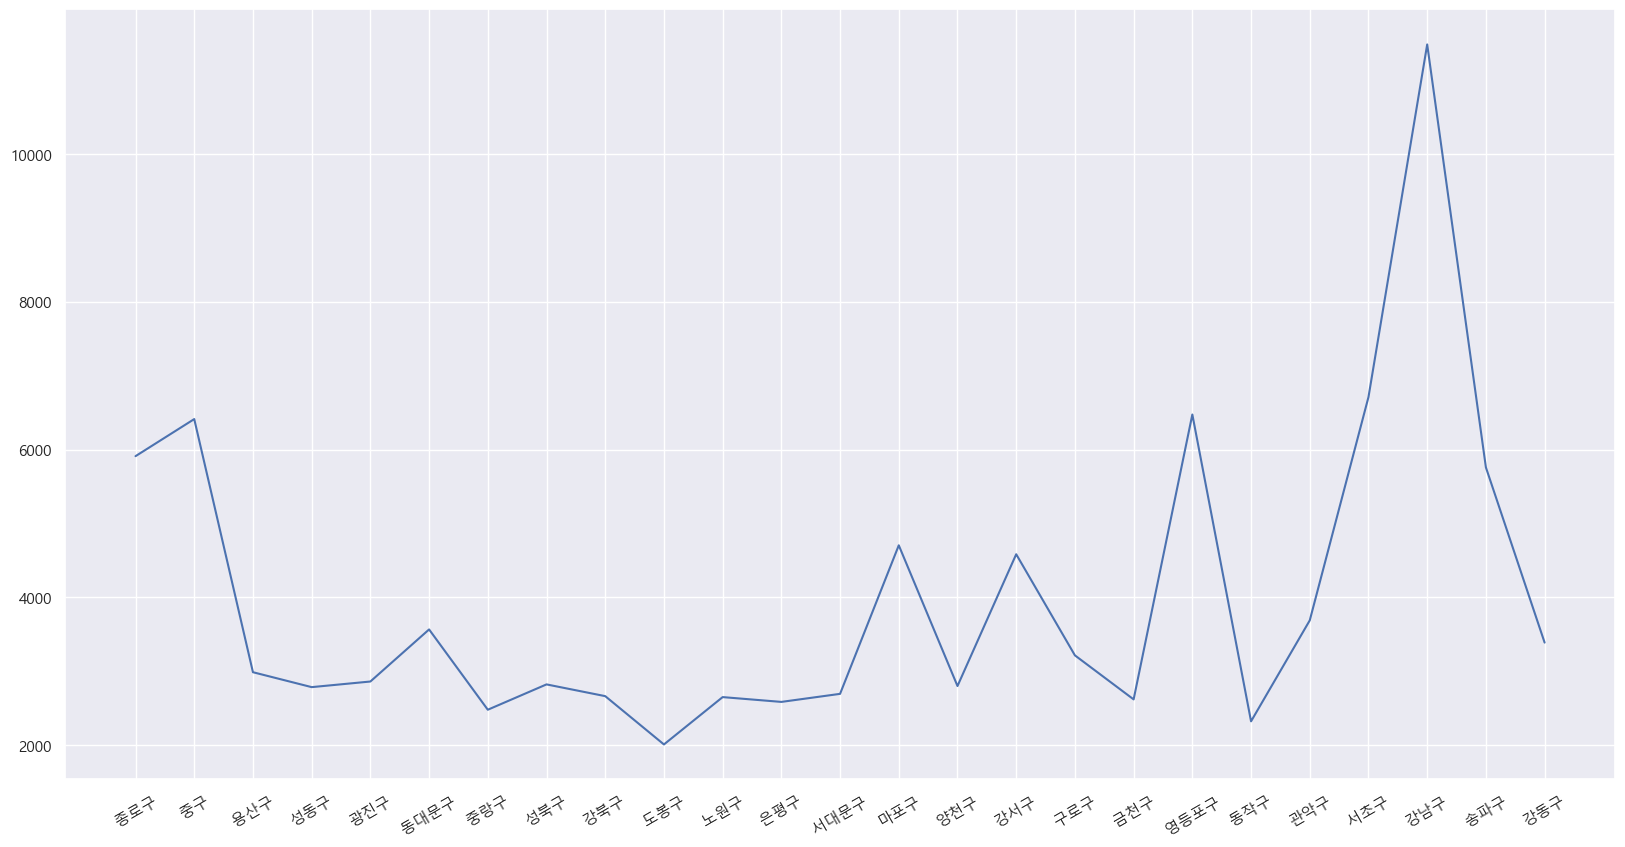

In [109]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(20,10))
plt.plot("자치구","한식일반음식점업(종사자)",data=seoul_business)
plt.xticks(rotation=30)
plt.show()

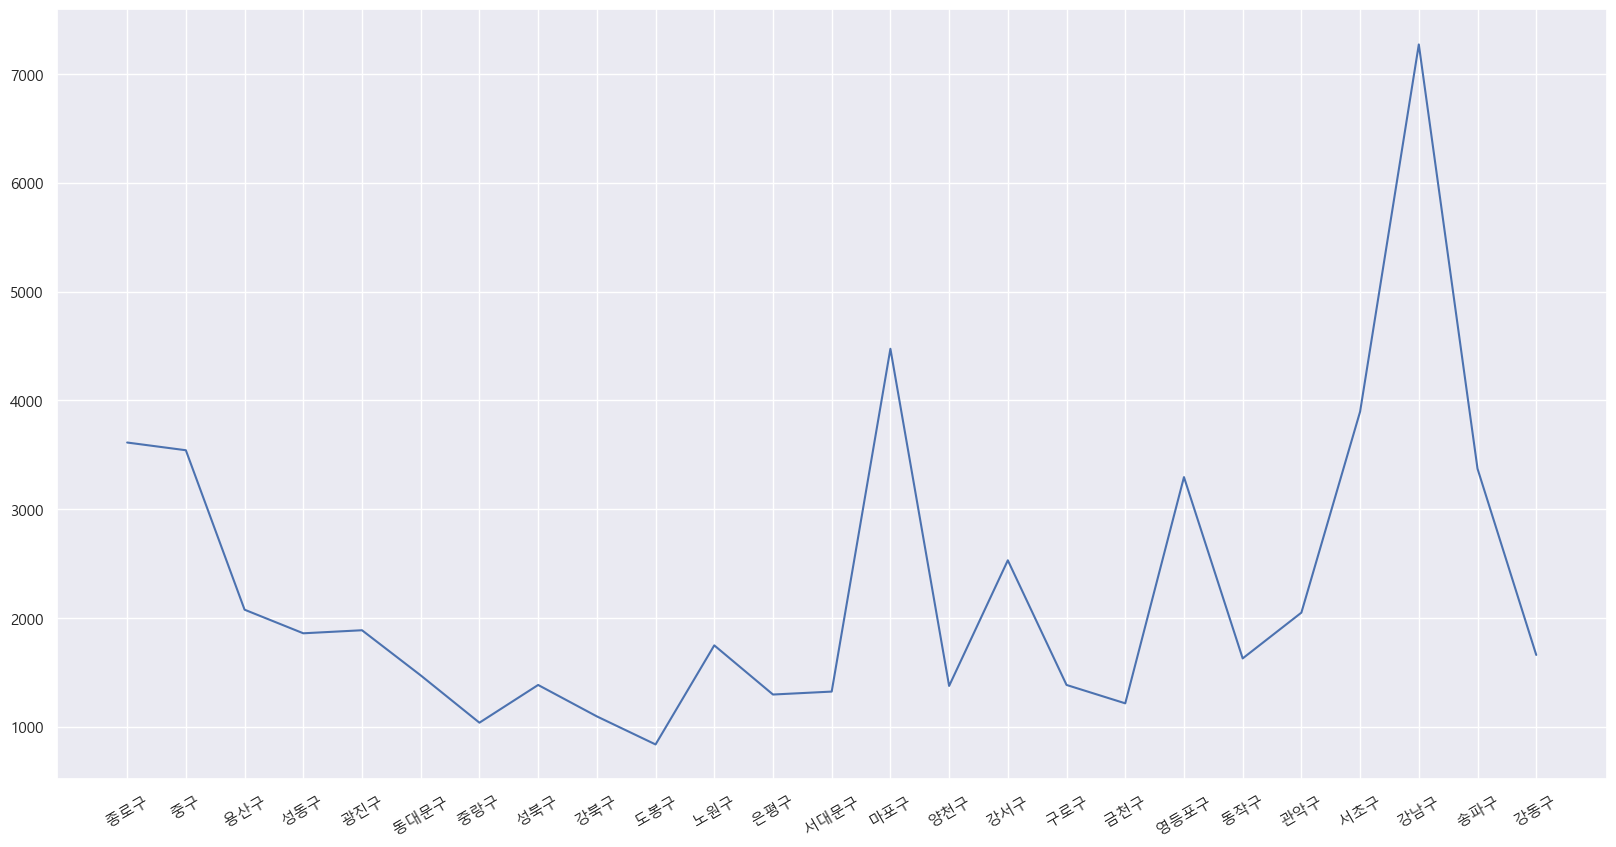

In [111]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(20,10))
plt.plot("자치구","커피전문점(종사자)",data=seoul_business)
plt.xticks(rotation=30)
plt.show()

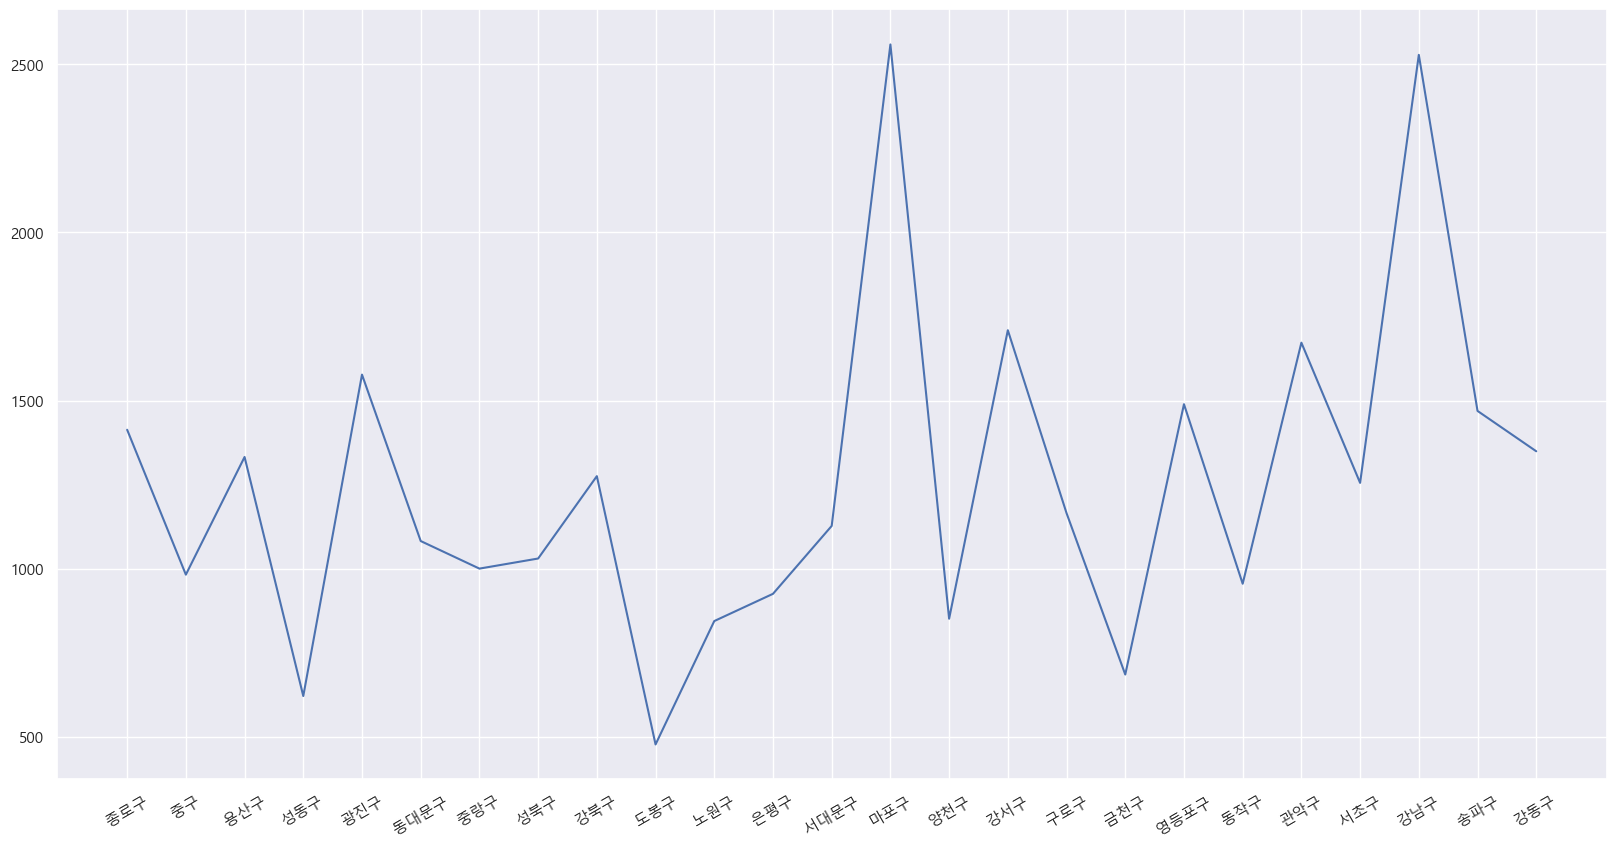

In [110]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(20,10))
plt.plot("자치구","기타주점업(종사자)",data=seoul_business)
plt.xticks(rotation=30)
plt.show()

In [ ]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 대한민국 사람들 대부분이 좋아하는 한식이 많이 위치해있는곳은 강남구>영등포구>중구
# 2. 카페를 정말 자주가는 대한민국사람들.. 카페는 강남구>마포구>종로구
# 3.술집은 골고루 분포되어있다. 그래도 마포구랑 강남구가 튀는 값!

---